In [20]:
!pip install catboost

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score

In [22]:
# 1️⃣ Chargement des données
df = pd.read_csv("real_estate_dataset.csv")  # Remplacez par le vrai fichier

In [23]:
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [24]:
df.shape

(500, 12)

In [25]:
# 2️⃣ Exploration des données
df.info() # Vérifier les types de données et les valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [26]:
df.describe() # Statistiques générales

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


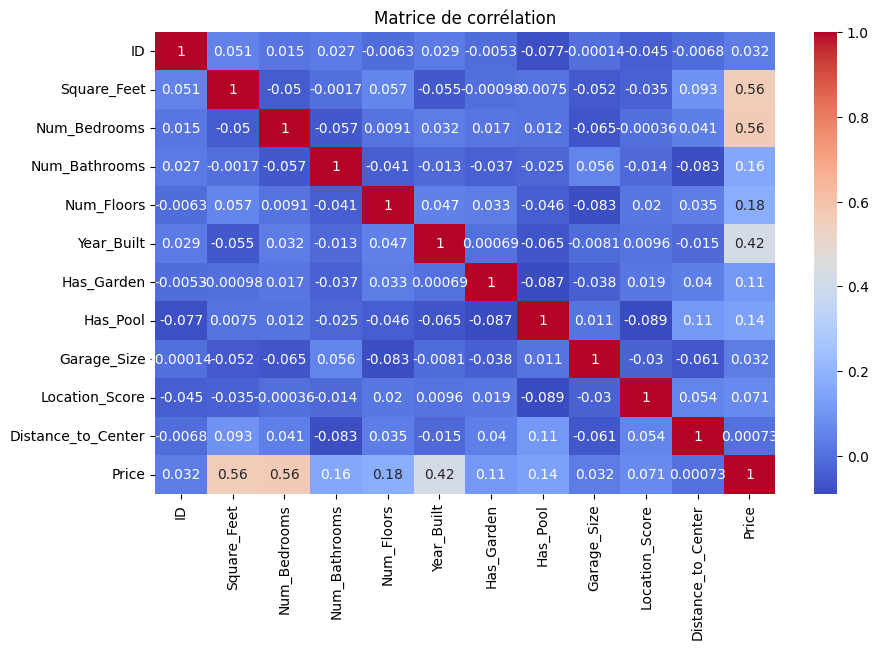

In [27]:
# Affichage des corrélations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

In [28]:
# 3️⃣ Prétraitement des données

#doublons
df.duplicated().sum()

0

In [29]:
#valeurs manquantes
df.isnull().sum()

,0
ID,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0


In [30]:
df["Property_Age"] = 2025 - df["Year_Built"]  # Création de la variable "Âge du bien"
df.drop(columns=["ID", "Year_Built"], inplace=True)  # Suppression des colonnes inutiles

In [31]:
# Séparation des features et de la cible
X = df.drop(columns=["Price"])
y = df["Price"]

In [32]:
# Normalisation des variables numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# 4️⃣ Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
# 5️⃣ Initialisation des modèles
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, verbose=0, random_state=42),
    "K-NN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, random_state=42),
    "LASSO": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "Régression Linéaire": LinearRegression()
}

In [42]:
# 6️⃣ Entraînement et évaluation des modèles
results = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Entraînement
    y_pred = model.predict(X_test)  # Prédiction

    # Calcul des métriques d'évaluation
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    accuracy = r2*100

    results.append((name, mae, rmse, r2, accuracy))


In [43]:
# 7️⃣ Affichage des performances des modèles
df_results = pd.DataFrame(results, columns=["Modèle", "MAE", "RMSE", "R²", "Précision en %" ])
df_results = df_results.sort_values(by="RMSE")

In [44]:
df_results

,Modèle,MAE,RMSE,R²,Précision en %
6,Régression Linéaire,16850.995605,20922.006589,0.970899,97.089914
4,LASSO,16851.074919,20922.095109,0.970899,97.089889
5,Ridge,16925.716476,21013.873313,0.970643,97.064302
1,CatBoost,27325.026352,34815.292995,0.919418,91.941777
3,XGBoost,39004.106435,48388.551738,0.844337,84.433735
0,Random Forest,41854.651321,51390.543796,0.824424,82.442382
2,K-NN,51774.256993,67274.676960,0.699114,69.911370
